In [1]:
# from swaptest import cswaptest
import numpy as np
from qiskit import aqua
from sklearn import datasets
import qiskit as qk
import random as rd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from knn import encode, predict
import itertools 

n_variables = 2 
n_train_points = 16 
n_test_points = 2  
k = 3
# use iris dataset
iris = datasets.load_iris()
labels = iris.target
data_raw = iris.data
# encode data
data_raw = encode(data_raw[:, :n_variables])

randomIndices0 = rd.sample(range(0, 50), 6)
randomIndices1 = rd.sample(range(55, 100), 5)
randomIndices2 = rd.sample(range(105, 150), 5)

indicsTrain = list(itertools.chain(randomIndices0, randomIndices1, randomIndices2))

print(indicsTrain)
n_test = n_test_points
indicsTest = []
while n_test != 0:
    random = (rd.sample(range(0, 150), 1))[0]
    if random in indicsTrain:
        indicsTest.append(random)
        n_test = n_test - 1
print(indicsTest)
# now pick these indices from the data
train_datas = np.asarray([data_raw[i] for i in indicsTrain])
train_labels =  np.asarray([labels[i] for i in indicsTrain])

test_datas = np.asarray([data_raw[i] for i in indicsTest])
test_labels =  np.asarray([labels[i] for i in indicsTest])

print(train_datas)
print(train_labels)
print(test_datas)
print('Test labels: ', test_labels)
print('Predict labels: ', predict(train_datas, train_labels, test_datas, k))


C:\Users\haime\AppData\Local\Programs\Python\Python37\lib\site-packages\qiskit\aqua\operators\operator_globals.py:48: DeprecationWarning: `from_label` is deprecated and will be removed no earlier than 3 months after the release date. Use Pauli(label) instead.
  X = make_immutable(PrimitiveOp(Pauli.from_label('X')))


[6, 34, 24, 10, 46, 23, 76, 89, 70, 56, 62, 127, 117, 130, 123, 138]
[138, 130]
[[0.80417614 0.59439106]
 [0.84507884 0.53464171]
 [0.81602448 0.57801734]
 [0.82493237 0.56523144]
 [0.80188283 0.59748132]
 [0.83957016 0.54325128]
 [0.9246781  0.38074981]
 [0.91036648 0.41380294]
 [0.87903186 0.47676304]
 [0.88583154 0.46400699]
 [0.93887632 0.34425465]
 [0.89734997 0.44131966]
 [0.89674427 0.44254912]
 [0.93528626 0.3538921 ]
 [0.91914503 0.3939193 ]
 [0.89442719 0.4472136 ]]
[0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[[0.89442719 0.4472136 ]
 [0.93528626 0.3538921 ]]
Test labels:  [2 2]
---


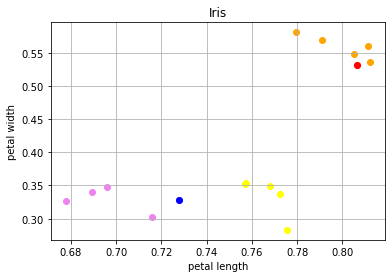

In [ ]:
import matplotlib.pyplot as plt

colours = {0:'orange', 1:'yellow', 2:'violet'}

colours2 = {0:'red', 1:'green', 2:'blue'}


for i in range(len(train_datas)):
    plt.scatter(train_datas[i][0], train_datas[i][1], color = colours[train_labels[i]])
for i in range(len(test_datas)):
    plt.scatter(test_datas[i][0], test_datas[i][1], color = colours2[test_labels[i]])
plt.title('Iris')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True)
plt.show()
